In [2]:
# importing required pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from optbinning import OptimalBinning
import xgboost 
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold,StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [3]:
ds = pd.read_csv('Skyserver.csv')
ds

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


### EDA and Data-preprocessing

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


From above data we see 10,000 instances, have no null values and also all predictor variables are numeric dtypes.

In [6]:
ds['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

Here, we that QSO(Quasar) class is having least number of instances, which can imply imbalance data in our multi-class.

In [7]:
for col in ds.columns:
    print('no. of unique value in column ',col+': ' , len(ds[col].unique()))

no. of unique value in column  objid:  1
no. of unique value in column  ra:  10000
no. of unique value in column  dec:  10000
no. of unique value in column  u:  9730
no. of unique value in column  g:  9817
no. of unique value in column  r:  9852
no. of unique value in column  i:  9890
no. of unique value in column  z:  9896
no. of unique value in column  run:  23
no. of unique value in column  rerun:  1
no. of unique value in column  camcol:  6
no. of unique value in column  field:  703
no. of unique value in column  specobjid:  6349
no. of unique value in column  class:  3
no. of unique value in column  redshift:  9637
no. of unique value in column  plate:  487
no. of unique value in column  mjd:  355
no. of unique value in column  fiberid:  892


From above data we see that 'objid' and 'rerun' only has only one unique value, which is not useful for modelling, so we shall drop it.

In [8]:
ds.drop(['objid','rerun'], 1, inplace = True)

In [9]:
# here we are separating columns having unique values more than 23 for separate analysis.
numeric_col = []
cat_col = []
for col in ds.columns:
    if len(ds[col].unique()) > 23:
        
           numeric_col.append(col)
    else:
           cat_col.append(col)

print('numeric columns: \n',numeric_col,'\n')
print('categorical columns: \n',cat_col)

numeric columns: 
 ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'] 

categorical columns: 
 ['run', 'camcol', 'class']


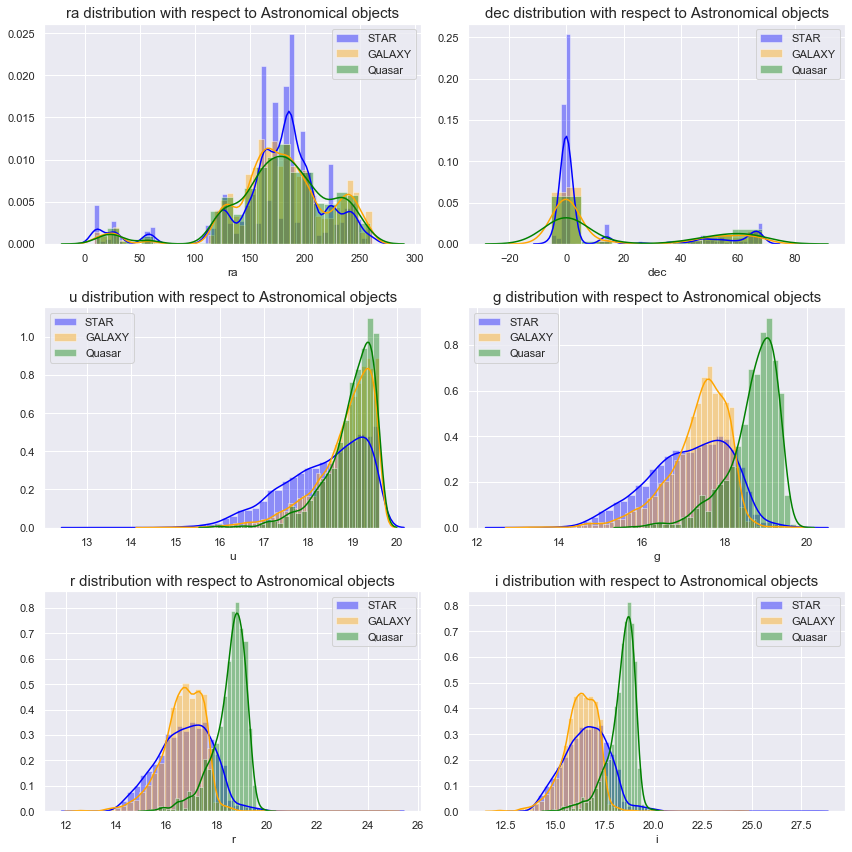

In [10]:
for i, col in enumerate(numeric_col[0:6]):
    
    plt.subplot(3,2, i+1)

    sb.distplot(ds[col][ds['class'] == 'STAR'], color = 'blue')
    sb.distplot(ds[col][ds['class'] == 'GALAXY'], color = 'orange')
    sb.distplot(ds[col][ds['class'] == 'QSO'],  color = 'green')
    
    plt.legend(['STAR','GALAXY', 'Quasar'])

    plt.title(col+' distribution with respect to Astronomical objects', fontsize = 15)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

From above distplot, we can infer that in features like i, r, g, the quasars likely have values larger then the stars and galaxies.

We also see some distributions having larger range with possible outliers.

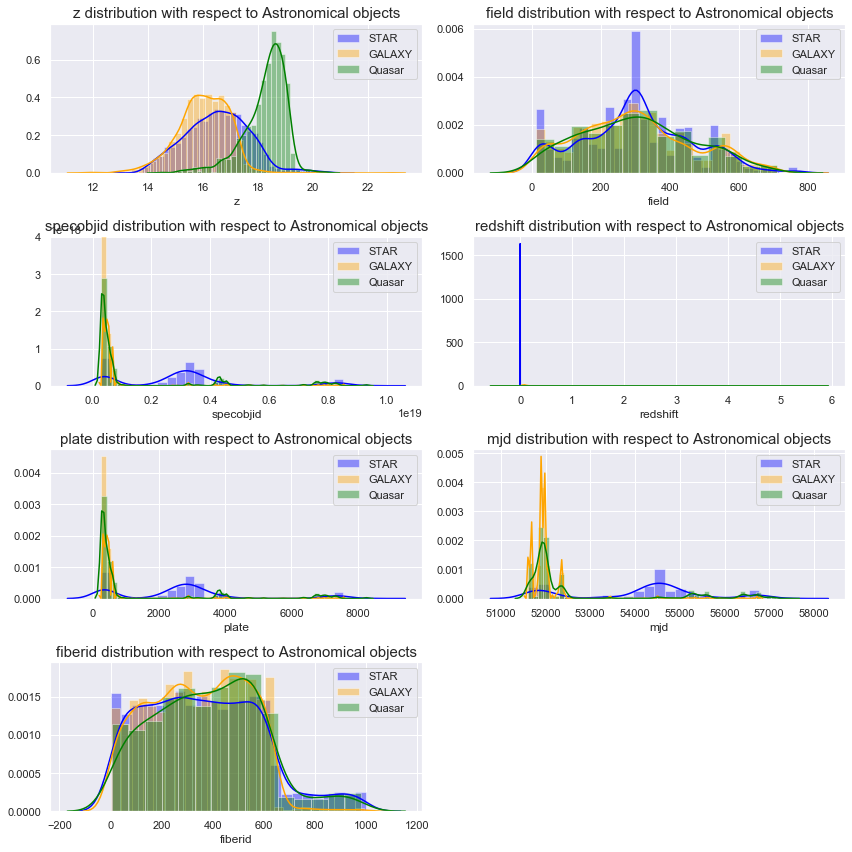

In [11]:
for i, col in enumerate(numeric_col[6:]):
    
    plt.subplot(4,2, i+1)

    sb.distplot(ds[col][ds['class'] == 'STAR'], color = 'blue')
    sb.distplot(ds[col][ds['class'] == 'GALAXY'], color = 'orange')
    sb.distplot(ds[col][ds['class'] == 'QSO'],  color = 'green')

    plt.legend(['STAR','GALAXY', 'Quasar'])
    
    plt.title(col+' distribution with respect to Astronomical objects', fontsize = 15)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

From above plots, we can infer that quasars likely have higher values of z compared to stars and galaxies.

We can see that features 'specobjid' and 'plate' have almost same distribution with respect to astronomical objects. Also feature 'mjd' somewhat resembles the same distribution as well.

We see that Stars strongly have redshift value near zero.

All astronomical objects have somewhat same field distributions, but fields having value between 200-400 strongly suggest that of a star.

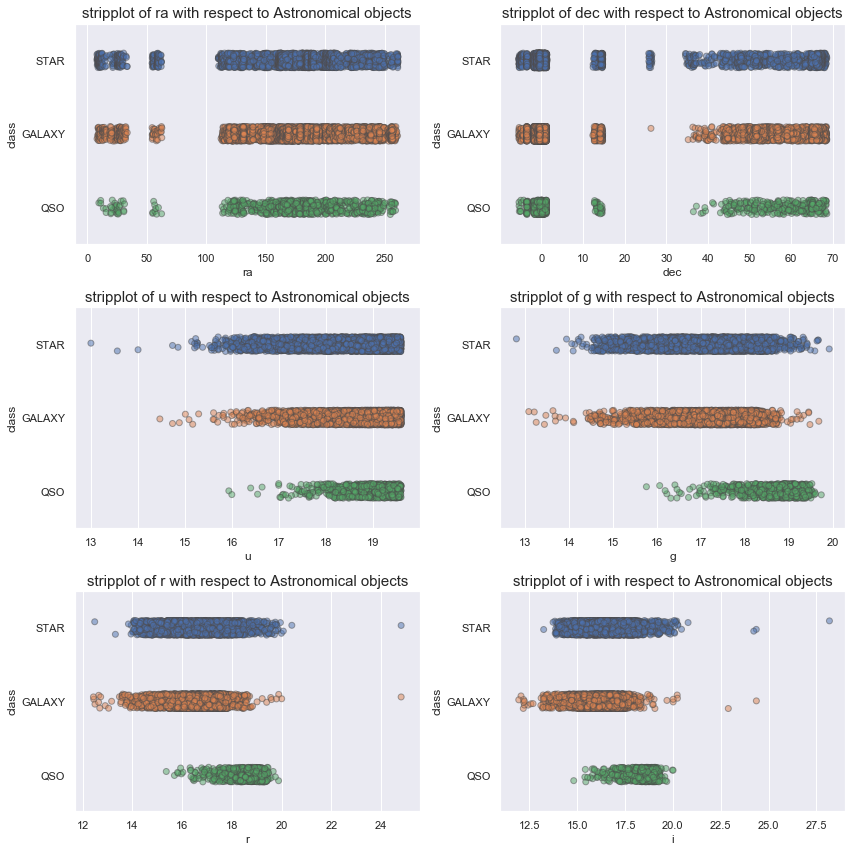

In [12]:
for i, col in enumerate(numeric_col[0:6]):
    
    plt.subplot(3,2, i+1)
    
    sb.stripplot(y="class", x= col , data=ds, alpha = 0.5 ,linewidth = 1, size = 6)

    plt.title('stripplot of ' + col + ' with respect to Astronomical objects', fontsize = 15)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

From above stripplots, we can say that distributions of 'ra' and 'dec' are discontinuous for certain range.

Also, in  distributions of 'u', 'g', 'r', 'i', we can see that quasars range in particular distributions are comparatively smaller and we can see some outliers/extreme points as well for other objects like stars and galaxies.

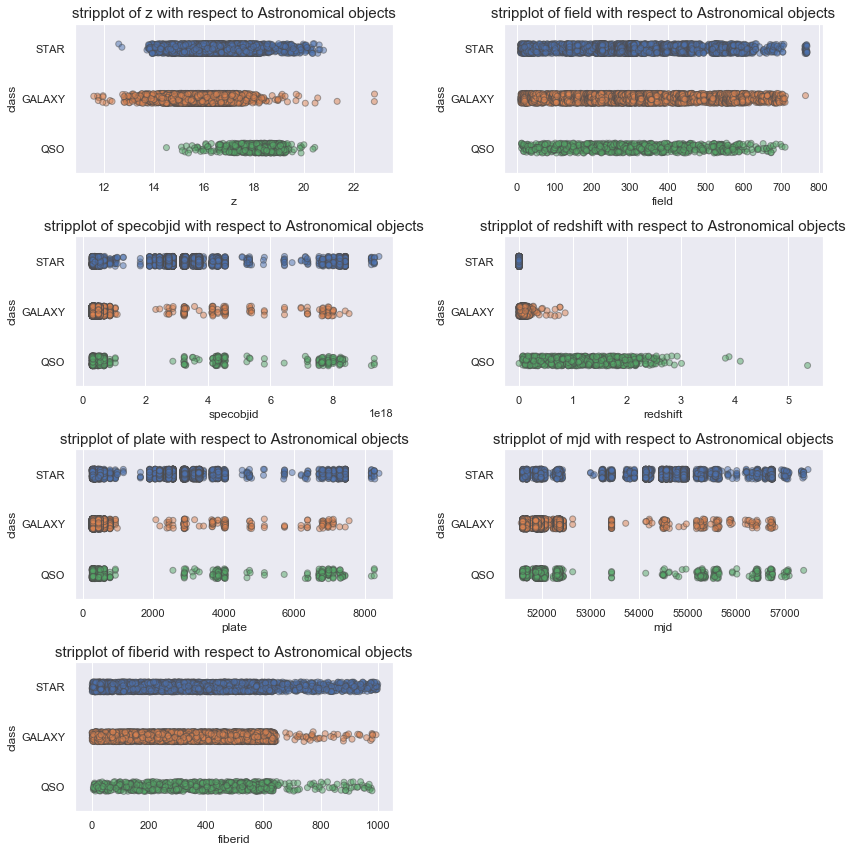

In [13]:
for i, col in enumerate(numeric_col[6:]):
    
    plt.subplot(4,2, i+1)
    
    sb.stripplot(y ="class", x = col , data=ds, alpha = 0.5 ,linewidth = 1, size = 6)

    plt.title('stripplot of ' + col + ' with respect to Astronomical objects', fontsize = 15)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

From above plots, we can see that features like 'specobjid' and 'plate' almost shares the same distribution. Also 'mjd' feature resembles somewhat to that distribution.

Galaxies and quasars have larger range for redshifts compared to star.

For feature 'fiberid', we see similar trend for galaxies and quasars, in which after a certain value, the distribution gets less polulated. Therefore, which may indicate  certain similar qualities between galaxies and quasars.

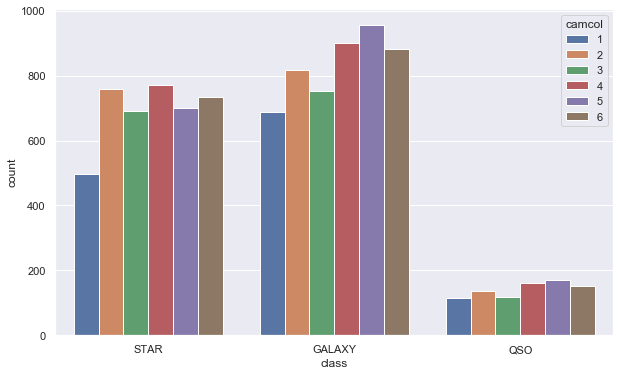

In [14]:
plt.figure(figsize = (10,6))
sb.countplot(x= 'class' , hue= 'camcol' , data= ds)

Here, we see same trends, interms of similar proportions of camcol type count for galaxies and quasars.
Whereas for stars, in contrast to galaxies and quasars, camcol type 4 is more then camcol type 5.

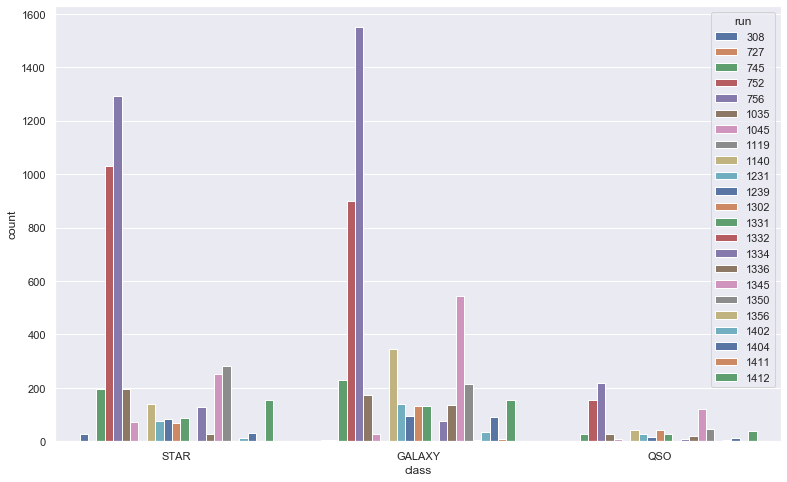

In [15]:
plt.figure(figsize = (13,8))
sb.countplot(x= 'class' , hue= 'run' , data= ds, palette ='deep')

From above bar plots, we can see the trend of galaxy resembles more to quasars in terms of different 'run' then the stars.

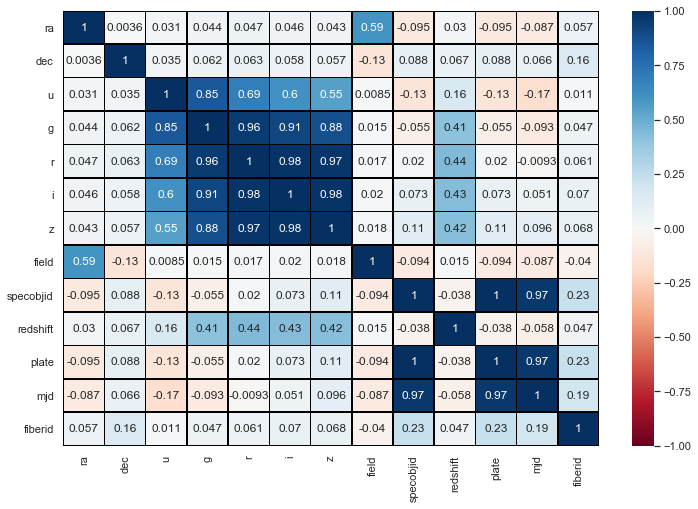

In [16]:
plt.figure(figsize = (12,8))
sb.heatmap(ds[numeric_col].corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black', annot = True)

From above heatmaps, we can see that many features are positively correlated, in which some are having correlations upto 0.98. So, to address this, we shall use PCA to reduce the dimension of our features and also to completely remove Multicollinearity.

Text(0.5, 1.0, 'Un-scaled numeric columns')

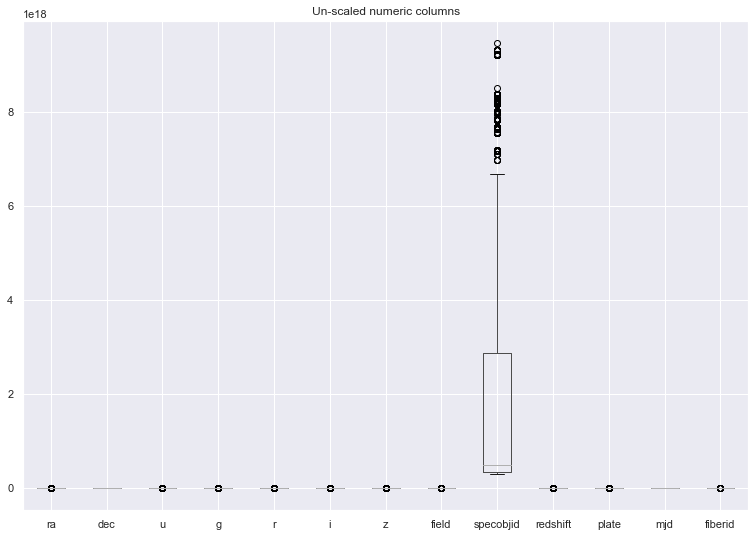

In [17]:
ds.boxplot(column = list(ds[numeric_col].columns), figsize = (13,9))
plt.title('Un-scaled numeric columns')

Here we see that features are in different scale, and also contains outliers.

In [18]:
# here we are using z threshold as 3 to filter out outliers.
z = abs(zscore(ds[numeric_col]))
ds_new = ds[(z<3).all(axis = 1)]

In [19]:
print('no. of outliers removed:',ds.shape[0] - ds_new.shape[0])

no. of outliers removed: 1302


In [20]:
# data-set after filtering possible outliers.
x = ds_new.drop('class', 1)
y = ds_new['class']

In [21]:
# mapping astronomical objects into its label for classification. 
y = y.map({'STAR':1,'GALAXY':2,'QSO':3})

In [22]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                     stratify = y,
                                                     random_state = 42,
                                                     test_size = 0.3)

In [23]:
x_test.shape, x_train.shape

((2610, 15), (6088, 15))

In [24]:
x_train.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [25]:
# robust-scaling all features.
for col in x_train.columns:
        
        scaler = RobustScaler()
        x_train[col] = scaler.fit_transform(x_train[col].values.reshape(-1,1))
        x_test[col] = scaler.transform(x_test[col].values.reshape(-1,1))

variance %:  [ 45.38  65.44  76.35  85.73  90.97  94.52  97.31  99.77  99.89  99.97
  99.99 100.01 100.01]


Text(0.5, 0, 'n_components')

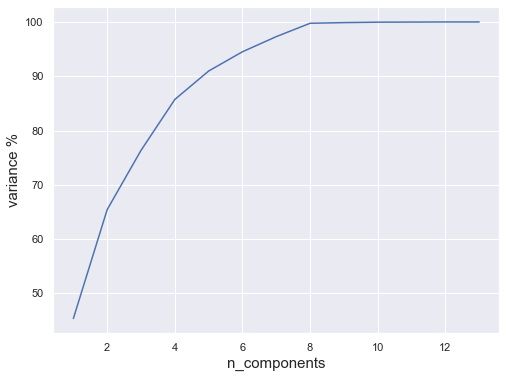

In [26]:
pca = PCA(n_components = 13)
pca.fit(x_train[numeric_col])
#The amount of variance that each PC can explain
var= pca.explained_variance_ratio_
#Cumulative Variance explained
varr=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print('variance %: ',varr)
plt.figure(figsize = (8,6))
plt.plot( np.arange(1,14,1), varr)
plt.ylabel('variance %', fontsize = 15)
plt.xlabel('n_components', fontsize = 15)

From above plots and  variance % , we can see that 9 principal components  can explain upto 99.89% of variance in our data, which is sufficient, so we shall choose n_components = 9. And by doing so, the dimension of our features gets reduced by 4.

In [27]:
pca = PCA(n_components = 9)
pca.fit(x_train[numeric_col]) # fitting PCA for train set

PCA(n_components=9)

In [28]:
# adding PCA components to train and test set, using fitted PCA.
x_train[['pca_1','pca_2','pca_3','pca_4','pca_5',
         'pca_6', 'pca_7','pca_8','pca_9']] = pca.transform(x_train.loc[:,numeric_col])

x_test[ ['pca_1','pca_2','pca_3','pca_4','pca_5',
    'pca_6', 'pca_7','pca_8','pca_9']] = pca.transform(x_test.loc[:,numeric_col])

# removing numeric columns that are fitted for PCA.
x_train.drop(numeric_col, 1, inplace = True)
x_test.drop(numeric_col, 1, inplace = True)

In [29]:
x_train

,run,camcol,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
4607,-0.006908,0.333333,0.321323,-0.201728,-2.180593,0.549729,0.018373,0.471320,-0.328246,0.289453,0.066663
8254,0.000000,-0.666667,-0.317280,-0.978483,-0.834596,-0.502194,-0.551266,-0.148896,0.270625,0.446591,-0.133167
3862,1.025907,-0.666667,-1.455787,0.288676,0.208302,1.759808,0.714183,-1.538646,0.035323,0.318796,0.022555
4861,0.000000,-0.666667,0.522739,0.328489,-0.715734,-0.572561,-0.444758,-0.058467,-0.948877,0.232539,-0.071336
7926,0.000000,0.333333,-0.282262,1.119503,-0.118082,-0.801028,-0.287575,0.286150,-0.554013,0.127242,-0.022172
...,...,...,...,...,...,...,...,...,...,...,...
7706,1.001727,-1.000000,0.594108,-0.473864,-0.715721,-0.504651,1.705394,-0.594419,-0.111167,-1.657453,0.117229
9033,1.017271,0.000000,0.764978,-0.085052,0.755684,-1.325005,0.698265,-0.683967,-0.668146,0.428192,0.011826
2723,0.998273,-0.666667,-1.835473,1.046103,1.235351,1.016542,-0.568212,-0.633172,1.248654,-1.292237,-0.257012
1948,0.000000,0.666667,-0.115822,-1.274681,0.153716,-1.034211,-0.423963,0.171887,0.542575,0.216281,-0.020821


In [30]:
s = StratifiedKFold(n_splits = 10)

### Base Model Evaluation

model: RandomForestClassifier()
CV score:0.9729843873872255
score_std: 0.006413964350598855
----------
model: LogisticRegression()
CV score:0.9850549758109436
score_std: 0.004124774505796526
----------
model: SVC()
CV score:0.9828904574490036
score_std: 0.005487884792798803
----------
model: AdaBoostClassifier()
CV score:0.8188371369663041
score_std: 0.03675560964248417
----------
model: GradientBoostingClassifier()
CV score:0.977672866672332
score_std: 0.006395993229970042
----------
model: KNeighborsClassifier()
CV score:0.9474010010121786
score_std: 0.011086991894877092
----------
model: XGBClassifier(silent=True)
CV score:0.9777824893580174
score_std: 0.005168463954189732
----------
model: DecisionTreeClassifier()
CV score:0.9471851365840601
score_std: 0.00987874984266141
----------
model: GaussianNB()
CV score:0.8992661214568471
score_std: 0.007031440324325616
----------


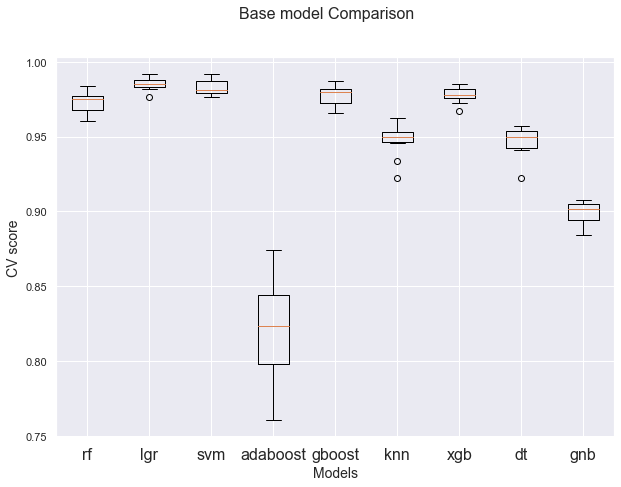

In [31]:
rf = RandomForestClassifier()
svm = SVC()
lgr = LogisticRegression()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier()
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier(silent = True)
dt = DecisionTreeClassifier()
gnb = GaussianNB()

models = [rf, lgr, svm, adaboost, gboost, knn, xgb, dt, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = s , scoring = 'f1_weighted', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 16)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rf', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb','dt','gnb'],
                  fontsize = 16)
plt.xlabel('Models', fontsize = 14)
plt.ylabel('CV score', fontsize = 14)
fig.set_size_inches(10,7)
plt.show() 

From above boxplots, we choose top 5 performing models that includes rf, lgr, svm, gboost and xgb based on their mean and median cv score.

### Hyper-parameter tuning

In [35]:
param_svm = dict(kernel = ['rbf','poly','sigmoid','linear'], gamma = np.arange(0.25,3,0.25), 
                 degree = [2,3,4],
             C = np.logspace(4,-4,60))

param_gboost =  dict(
   learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
   max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
   n_estimators = [100, 150, 200],
   min_samples_split = [1,2,3],
   min_samples_leaf = [1,2], random_state = [41,42,43])

param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ], alpha = [0.05,0.1,0.5,0.75,1,1.75,2],
                 reg_lambda = [0.05,0.1,0.5,0.75,1,1.75,2])

param_lgr = dict(penalty = ['l1','l2'],  C = np.logspace(4,-4,60), 
                 solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 max_iter = [100,150,200,250,300])


param_rf = dict(n_estimators = [10,15,20,25,30], criterion = ['gini', 'entropy'],
                max_depth = [3,4,5,6,7,8,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [41,42,43])

In [36]:
model_param_list = [(lgr,param_lgr), (xgb, param_xgb), (gboost, param_gboost), (svm, param_svm),
                      (rf, param_rf)]

In [34]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_search = RandomizedSearchCV(model, param, cv = s, n_jobs = -1, scoring = 'f1_weighted',
                                  random_state = 42)
    r_search.fit( x_train, y_train.values.ravel())
    best_cvscore = r_search.best_score_
    best_param = r_search.best_params_
    best_estimator = r_search.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: LogisticRegression()
best_cvscore: 0.9920465803629936
best_param: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 150, 'C': 602.0894493336125}


model: XGBClassifier(silent=True)
best_cvscore: 0.9817236557110924
best_param: {'reg_lambda': 1, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.25, 'gamma': 0.0, 'colsample_bytree': 0.5, 'alpha': 1}


model: GradientBoostingClassifier()
best_cvscore: 0.9851809550671723
best_param: {'random_state': 43, 'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 8, 'learning_rate': 0.15}


model: SVC()
best_cvscore: 0.9823952473976163
best_param: {'kernel': 'poly', 'gamma': 1.25, 'degree': 3, 'C': 0.004237587160604063}


model: RandomForestClassifier()
best_cvscore: 0.9672668987920059
best_param: {'random_state': 43, 'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}


best_estimators: [LogisticRegression(C=602.0894493336125, max_iter=150), XGBClassif

### Testing

In [35]:
print('*******TRAIN RESULTS*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_train)
    score = accuracy_score(y_train, y_pred)
    print('model',model)
    print('accuracy:',round(score*100,2),'%','\n')
    print('f1_score:',round(f1_score(y_train,y_pred, average = 'weighted')*100,2),'%','\n')
    print('Classification report:','\n', classification_report(y_train, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TRAIN RESULTS*******


model LogisticRegression(C=602.0894493336125, max_iter=150)
accuracy: 99.26 % 

f1_score: 99.26 % 

Classification report: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      2460
           2       0.99      0.99      0.99      3340
           3       0.97      0.93      0.95       288

    accuracy                           0.99      6088
   macro avg       0.99      0.97      0.98      6088
weighted avg       0.99      0.99      0.99      6088

------------------------------------------------------------------------------


model XGBClassifier(alpha=1, colsample_bytree=0.5, gamma=0.0, learning_rate=0.25,
              max_depth=6, min_child_weight=5, objective='multi:softprob',
              silent=True)
accuracy: 99.98 % 

f1_score: 99.98 % 

Classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2460
           2       1.00  

In [36]:
print('*******TEST RESULTS********')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    print('Model:',model,'\n')
    print('accuracy:',round(score*100,2),'%','\n')
    print('f1_score:',round(f1_score(y_test,y_pred, average = 'weighted')*100,2),'%','\n')
    print('confusion_matrix:','\n',confusion_matrix(y_test,y_pred),'\n')
    print('Classification report:','\n', classification_report(y_test, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TEST RESULTS********


Model: LogisticRegression(C=602.0894493336125, max_iter=150) 

accuracy: 99.0 % 

f1_score: 99.01 % 

confusion_matrix: 
 [[1052    0    2]
 [   6 1416   10]
 [   0    8  116]] 

Classification report: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1054
           2       0.99      0.99      0.99      1432
           3       0.91      0.94      0.92       124

    accuracy                           0.99      2610
   macro avg       0.96      0.97      0.97      2610
weighted avg       0.99      0.99      0.99      2610

------------------------------------------------------------------------------


Model: XGBClassifier(alpha=1, colsample_bytree=0.5, gamma=0.0, learning_rate=0.25,
              max_depth=6, min_child_weight=5, objective='multi:softprob',
              silent=True) 

accuracy: 98.16 % 

f1_score: 98.16 % 

confusion_matrix: 
 [[1046    8    0]
 [  24 1400    8]
 [   0    8  116]] 



From the above results, we can conclude that Logistic Regression model performed the best on test set based on f1 score and overall accuracy of 99%. Therefore, we shall choose our classifier as Logistic Regression in this project.

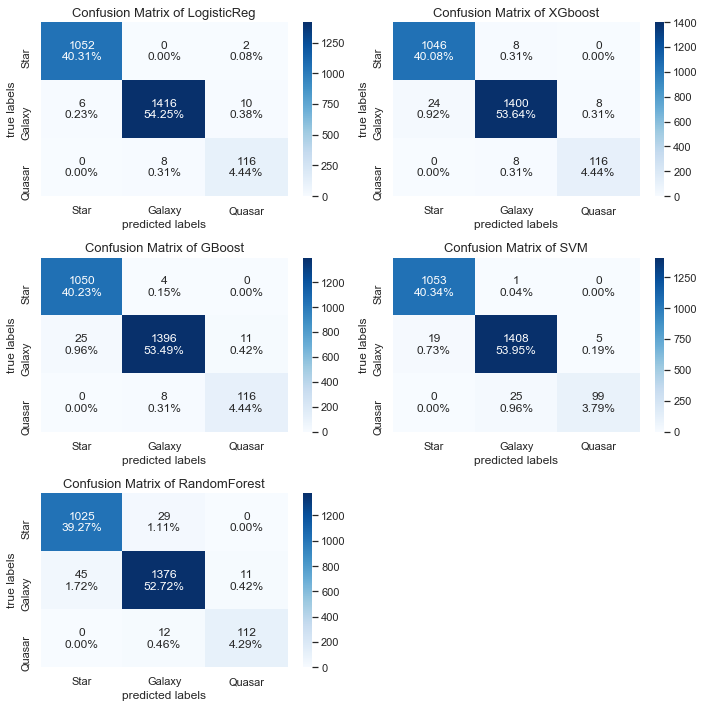

In [43]:
# visualizing confusion matrix  with the help of heatmaps.
model_index = [0,1,2,3,4,5]
model = ['LogisticReg','XGboost','GBoost','SVM','RandomForest','GaussianNB']

for index ,model, model_name in zip(model_index,best_estimator_list,model):
    plt.subplot(3,2, index + 1 )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    c_matric = confusion_matrix(y_test, y_pred)

    group_counts = ['{0:0.0f}'.format(value) for value in
                c_matric.flatten()]
    group_percent = ['{0:.2%}'.format(value) for value in
                     c_matric.flatten()/np.sum(c_matric)]
    labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_counts,group_percent)]
    labels = np.asarray(labels).reshape(3,3)
    sb.heatmap(c_matric, annot=labels, fmt='', cmap='Blues')
    plt.title('Confusion Matrix of ' + model_name, fontsize = 13)
    
    plt.ylabel('true labels')
    plt.xlabel('predicted labels')
    fig, ax = plt.gcf(), plt.gca()
    ax.set_xticklabels(['Star','Galaxy','Quasar'])
    ax.set_yticklabels(['Star','Galaxy','Quasar'])
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

From above heatmaps, we can conclude that models- Logistic Regression, XGboost and Gradientboost performed the best is classifying the minor class (i.e. Quasars).

Also, for classification of  Galaxies, Logistic Regression performed the best, whereas for Stars SVM performed the best, in which it performed slightly better then Logistic Regression.

Therefore, overall, Logistic Regression performed the best.

In [38]:
# selecting the best performing model for classifiaction.
selected_model = LogisticRegression(C=602.0894493336125, max_iter=150)
selected_model.fit(x_train, y_train)
y_pred = selected_model.predict(x_test)

In [40]:
test_df = pd.DataFrame({'Actual Astronomical Objects':y_test.values,'Predicted Astronomical Objects':y_pred})

In [41]:
test_df.to_csv('astro_obj_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [42]:
# Saving the final model as Logistic Regression.
import joblib

joblib.dump(selected_model, 'astro_obj_pred.obj')
print('Model successfully saved.')

Model successfully saved.
